In [348]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score



In [349]:
df=pd.read_csv("pet_adoption_data.csv")

In [350]:
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


### **1.EDA**

In [351]:
print(df.head())

   PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0    500    Bird          Parakeet        131  Orange   Large   5.039768   
1    501  Rabbit            Rabbit         73   White   Large  16.086727   
2    502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3    503    Bird          Parakeet         97   White   Small   3.339423   
4    504  Rabbit            Rabbit        123    Gray   Large  20.498100   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0           1                0                 27          140              0   
1           0                0                  8          235              0   
2           0                0                 85          385              0   
3           0                0                 61          217              1   
4           0                0                 28           14              1   

   AdoptionLikelihood  
0                   0  
1       

In [352]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB
None


In [353]:
df.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


#### **PetType**

In [354]:
pet_type_counts = df['PetType'].value_counts()
print(pet_type_counts)

PetType
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64


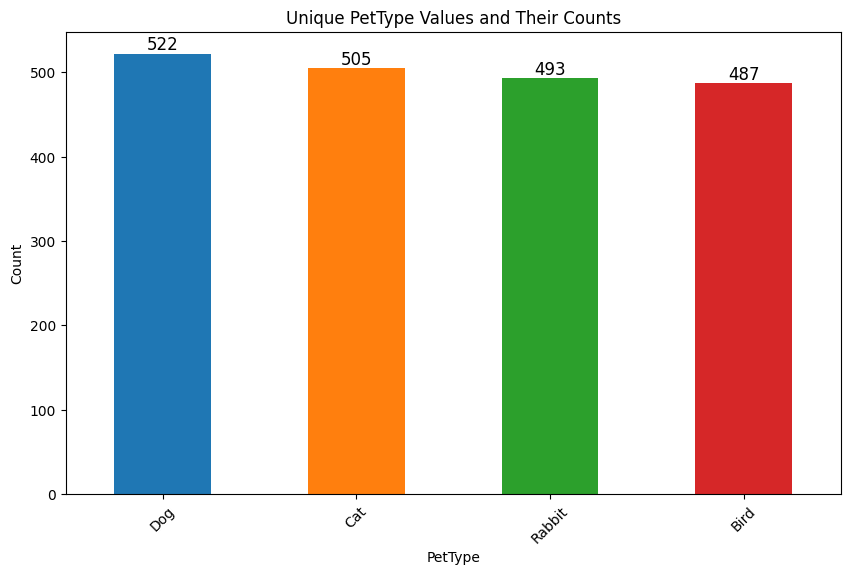

In [355]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(10, 6))
pet_type_counts.plot(kind='bar', color=colors)
plt.title('Unique PetType Values and Their Counts')
plt.xlabel('PetType')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, count in enumerate(pet_type_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

#### **Breed**

In [356]:
breed_counts = df['Breed'].value_counts()
print(breed_counts)

Breed
Rabbit              493
Parakeet            487
Siamese             253
Persian             252
Labrador            193
Poodle              167
Golden Retriever    162
Name: count, dtype: int64


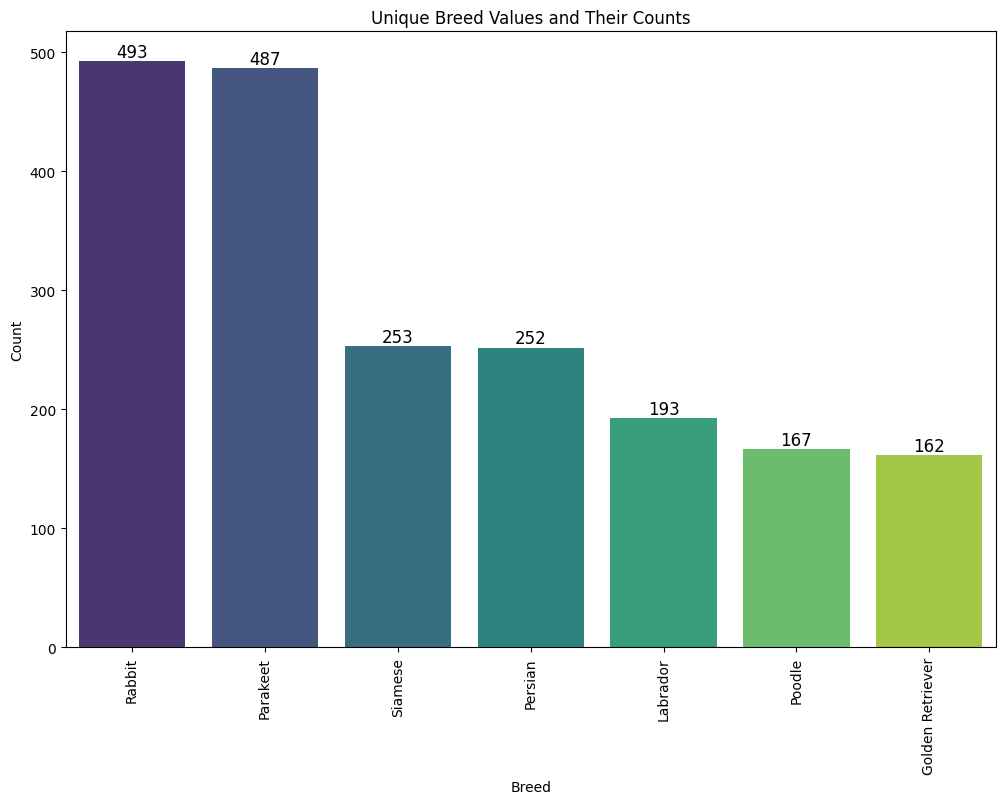

In [357]:
plt.figure(figsize=(12, 8))
sns.barplot(x=breed_counts.index, y=breed_counts.values, palette='viridis')
plt.title('Unique Breed Values and Their Counts')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=90)
for i, count in enumerate(breed_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)


plt.show()

#### **Color**

In [358]:
color_counts=df['Color'].value_counts()
print(color_counts)

Color
White     420
Orange    409
Gray      400
Black     395
Brown     383
Name: count, dtype: int64


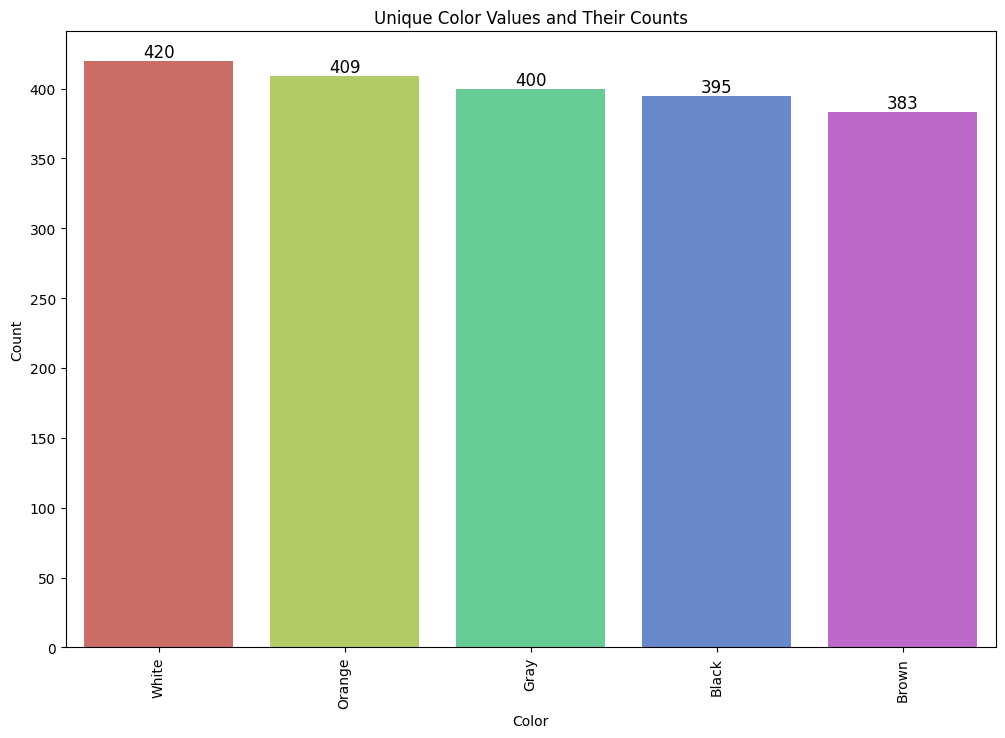

In [359]:
plt.figure(figsize=(12, 8))
sns.barplot(x=color_counts.index, y=color_counts.values, palette='hls')
plt.title('Unique Color Values and Their Counts')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=90)
for i, count in enumerate(color_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)


#### **Size**

In [360]:
size_counts=df['Size'].value_counts()
print(size_counts)

Size
Medium    714
Small     663
Large     630
Name: count, dtype: int64


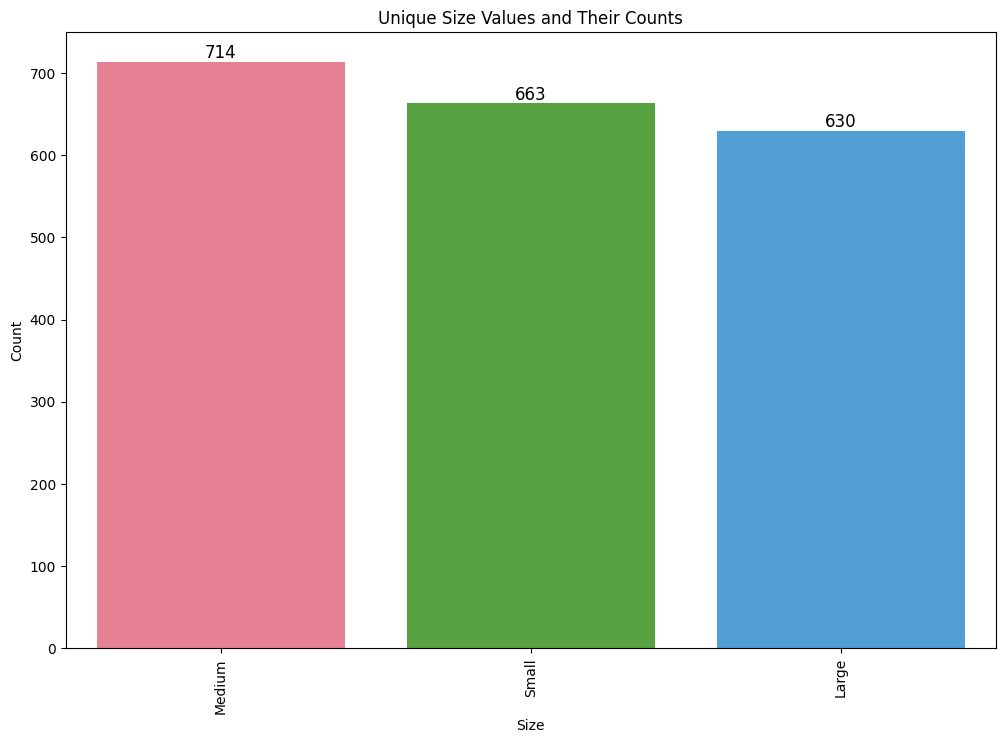

In [361]:
plt.figure(figsize=(12, 8))
sns.barplot(x=size_counts.index, y=size_counts.values, palette='husl')
plt.title('Unique Size Values and Their Counts')
plt.xlabel('Size')
plt.ylabel('Count')
plt.xticks(rotation=90)
for i, count in enumerate(size_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)


#### **AgeMonth**

In [362]:
Agemonth_counts=df['AgeMonths'].value_counts()
print(Agemonth_counts)

AgeMonths
149    24
8      19
21     18
101    18
113    18
       ..
18      6
37      6
33      5
40      5
140     5
Name: count, Length: 179, dtype: int64


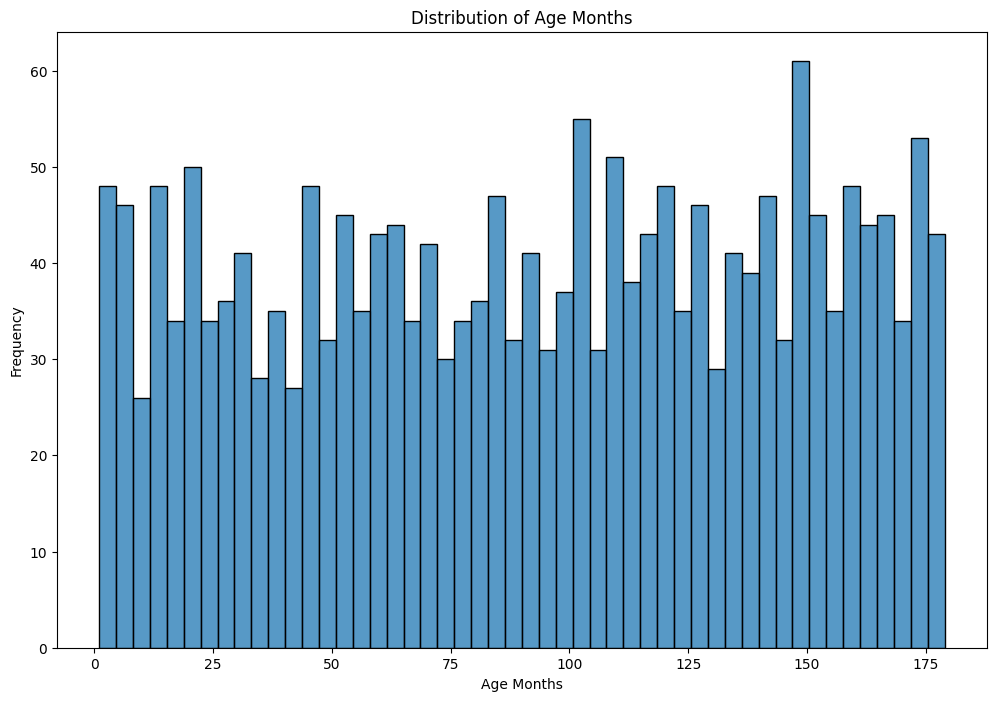

In [363]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="AgeMonths", bins=50)  
plt.title("Distribution of Age Months")
plt.xlabel("Age Months")
plt.ylabel("Frequency")
plt.show()

#### **Vaccinated**

In [364]:
vaccinated_counts=df['Vaccinated'].value_counts()
print(vaccinated_counts)

Vaccinated
1    1407
0     600
Name: count, dtype: int64


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

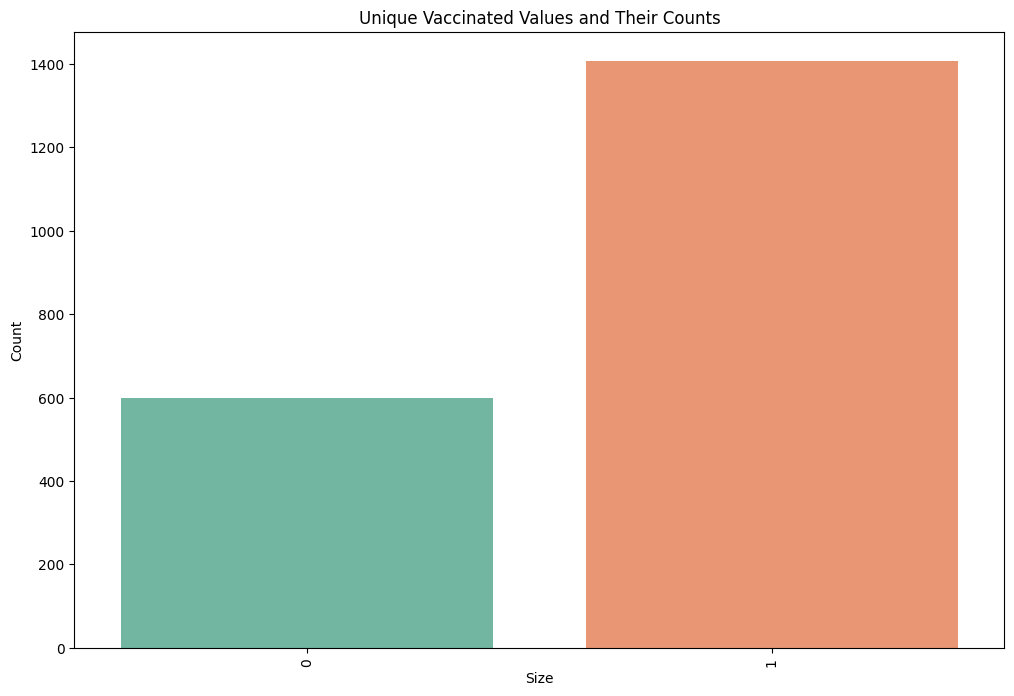

In [365]:
plt.figure(figsize=(12, 8))
sns.barplot(x=vaccinated_counts.index, y=vaccinated_counts.values, palette='Set2')
plt.title('Unique Vaccinated Values and Their Counts')
plt.xlabel('Size')
plt.ylabel('Count')
plt.xticks(rotation=90)


#### **HealthCondition**

In [366]:
HealthCondition_counts=df['HealthCondition'].value_counts()
print(HealthCondition_counts)

HealthCondition
0    1613
1     394
Name: count, dtype: int64


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

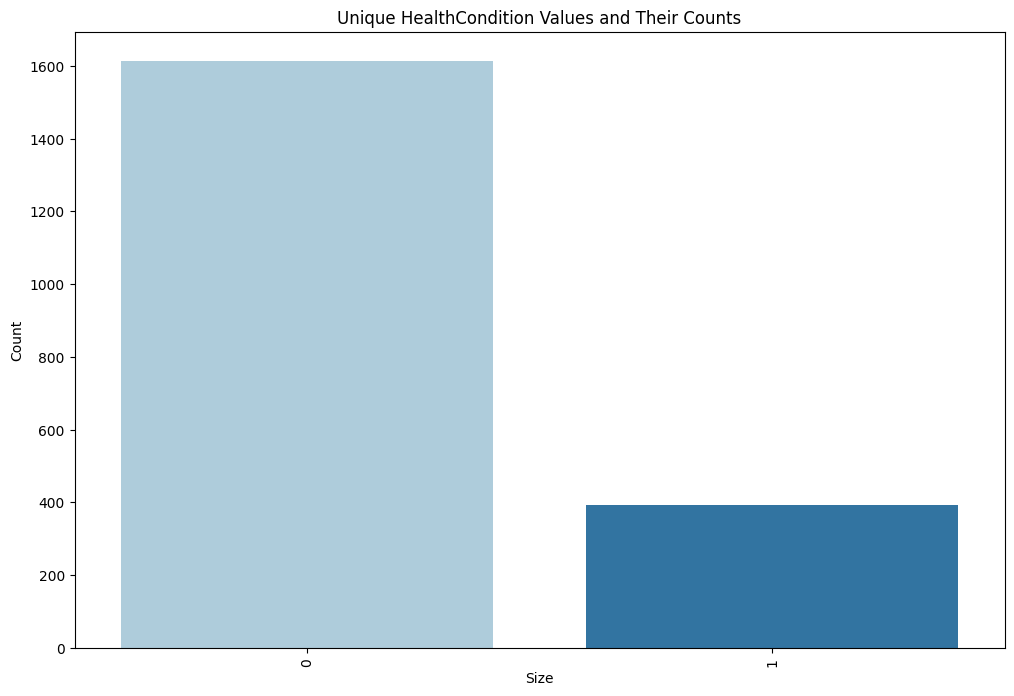

In [367]:
plt.figure(figsize=(12, 8))
sns.barplot(x=HealthCondition_counts.index, y=HealthCondition_counts.values, palette='Paired')
plt.title('Unique HealthCondition Values and Their Counts')
plt.xlabel('Size')
plt.ylabel('Count')
plt.xticks(rotation=90)

#### **TimeInShelterDays**

In [368]:
TimeInShelterDays_counts=df['TimeInShelterDays'].value_counts()
print(TimeInShelterDays_counts)

TimeInShelterDays
15    40
52    36
21    32
6     30
79    30
      ..
32    14
39    14
16    12
80    12
11     9
Name: count, Length: 89, dtype: int64


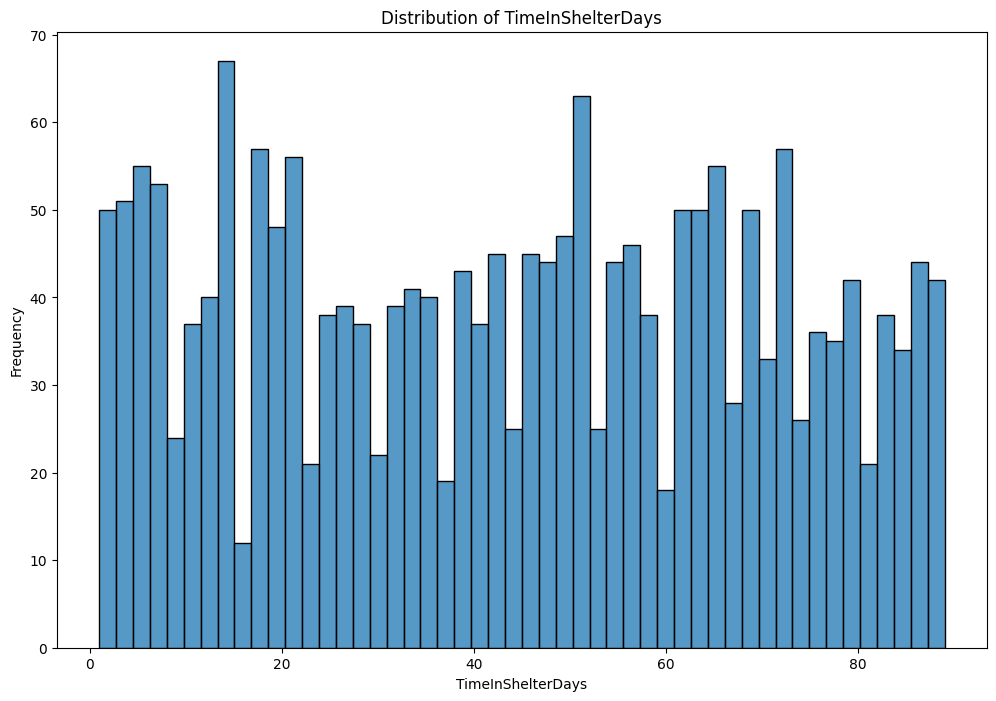

In [369]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="TimeInShelterDays", bins=50)  
plt.title("Distribution of TimeInShelterDays")
plt.xlabel("TimeInShelterDays")
plt.ylabel("Frequency")
plt.show()

#### **AdoptionFee**

In [370]:
AdoptionFee_counts=df['AdoptionFee'].value_counts()
print(AdoptionFee_counts)

AdoptionFee
111    11
423    10
88     10
181    10
87     10
       ..
19      1
311     1
299     1
83      1
26      1
Name: count, Length: 493, dtype: int64


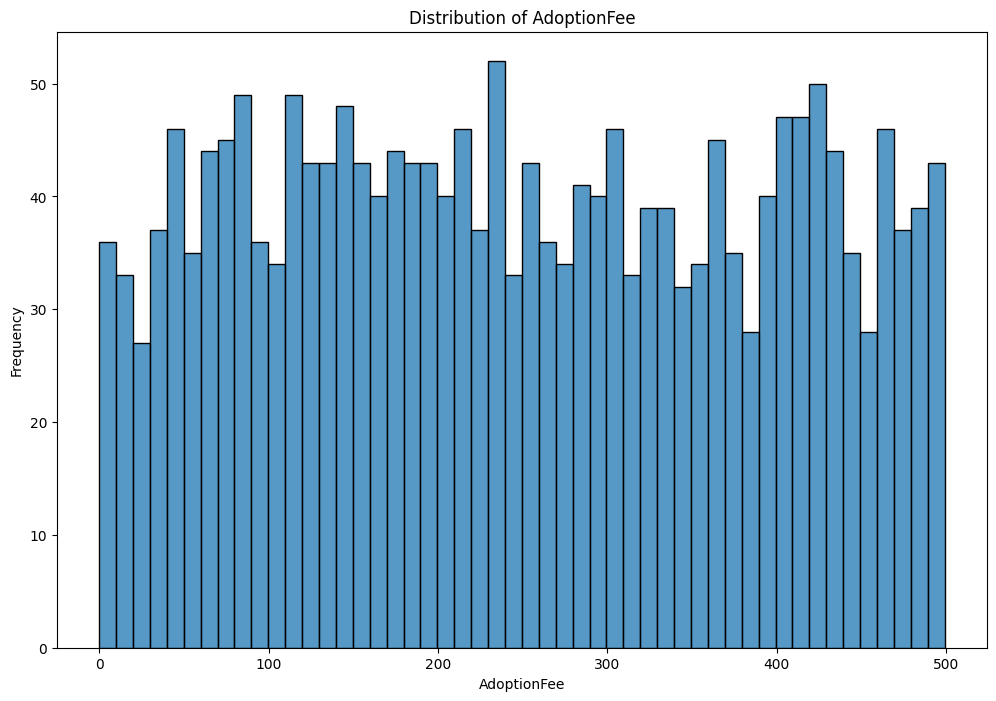

In [371]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="AdoptionFee", bins=50)  
plt.title("Distribution of AdoptionFee")
plt.xlabel("AdoptionFee")
plt.ylabel("Frequency")
plt.show()

#### **PreviousOwner**

In [372]:
PreviousOwner_counts=df['PreviousOwner'].value_counts()
print(PreviousOwner_counts)

PreviousOwner
0    1401
1     606
Name: count, dtype: int64


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

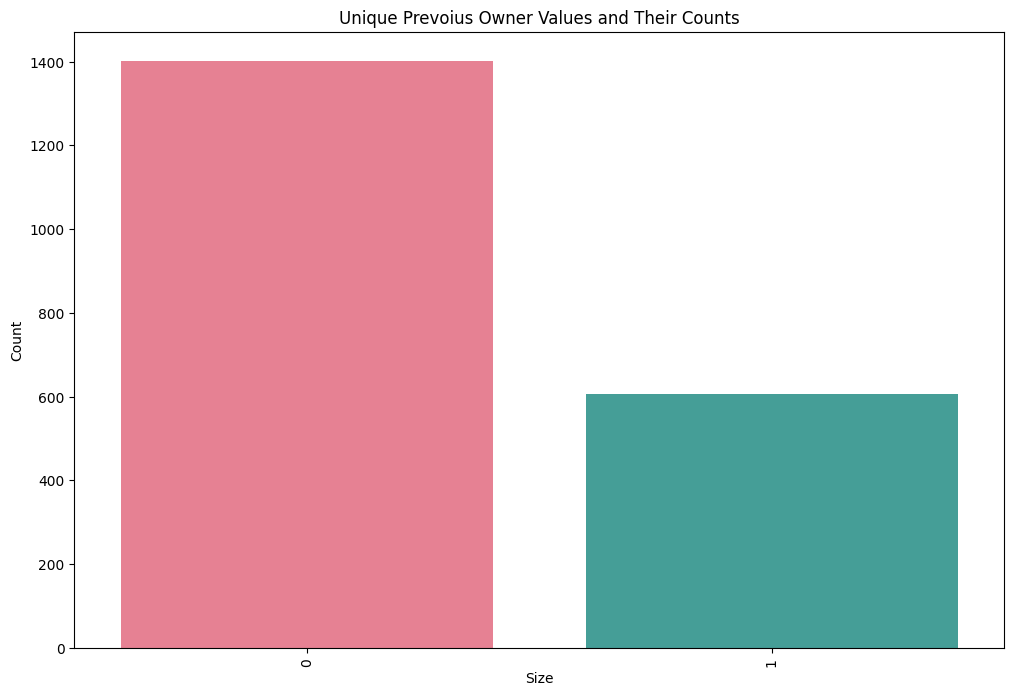

In [373]:
plt.figure(figsize=(12, 8))
sns.barplot(x=PreviousOwner_counts.index, y=PreviousOwner_counts.values, palette='husl')
plt.title('Unique Prevoius Owner Values and Their Counts')
plt.xlabel('Size')
plt.ylabel('Count')
plt.xticks(rotation=90)

#### **AdoptionLikelihood**

In [374]:
AdoptionLikelihood_counts=df['AdoptionLikelihood'].value_counts()
print(AdoptionLikelihood_counts)

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

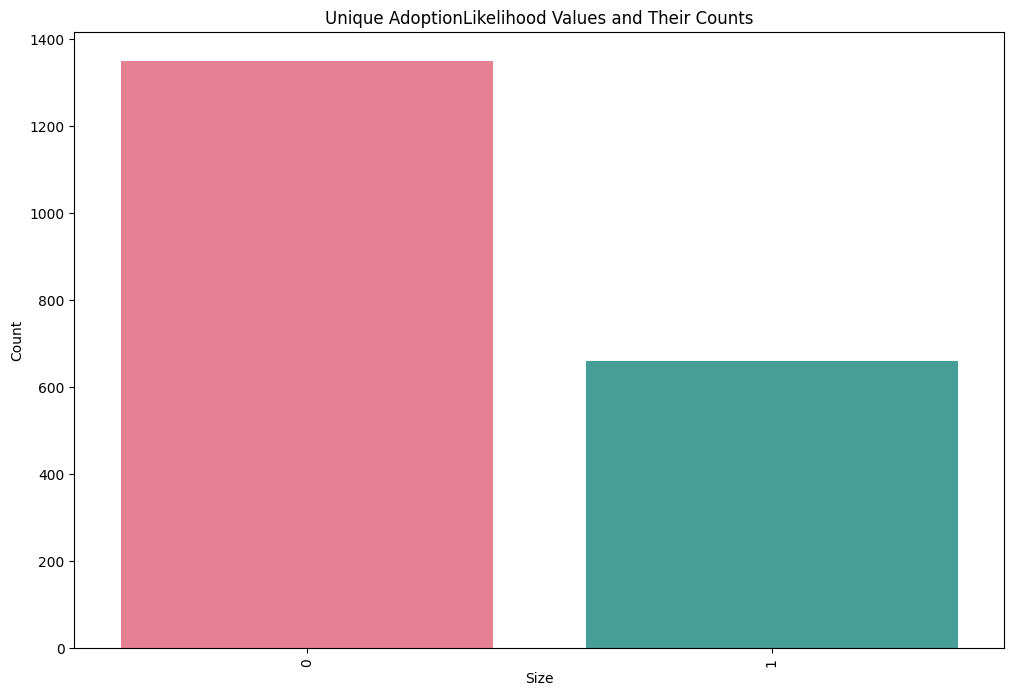

In [375]:
plt.figure(figsize=(12, 8))
sns.barplot(x=AdoptionLikelihood_counts.index, y=AdoptionLikelihood_counts.values, palette='husl')
plt.title('Unique AdoptionLikelihood Values and Their Counts')
plt.xlabel('Size')
plt.ylabel('Count')
plt.xticks(rotation=90)

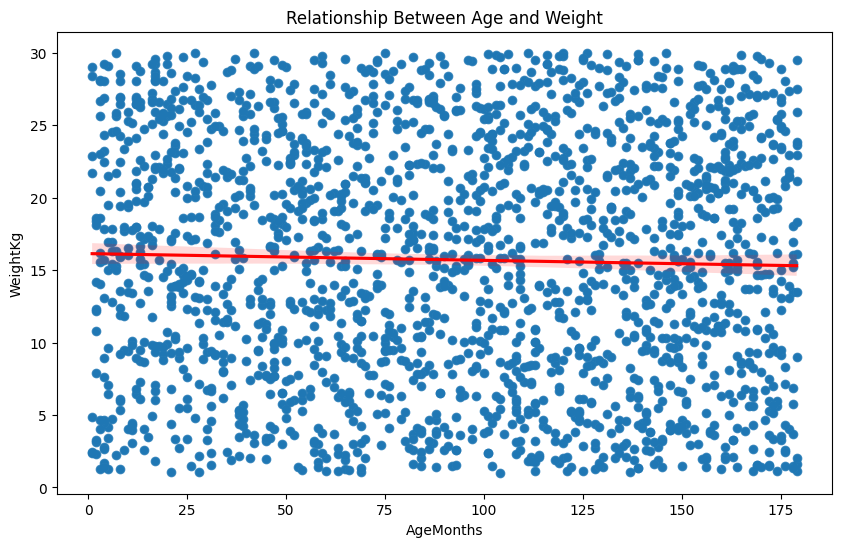

In [376]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="AgeMonths", y="WeightKg")
plt.title('Relationship Between Age and Weight')
plt.xlabel('Age (Months)')
plt.ylabel('Weight')

# Add a trendline (optional)
sns.regplot(data=df, x="AgeMonths", y="WeightKg", line_kws={'color': 'red'})

plt.show()

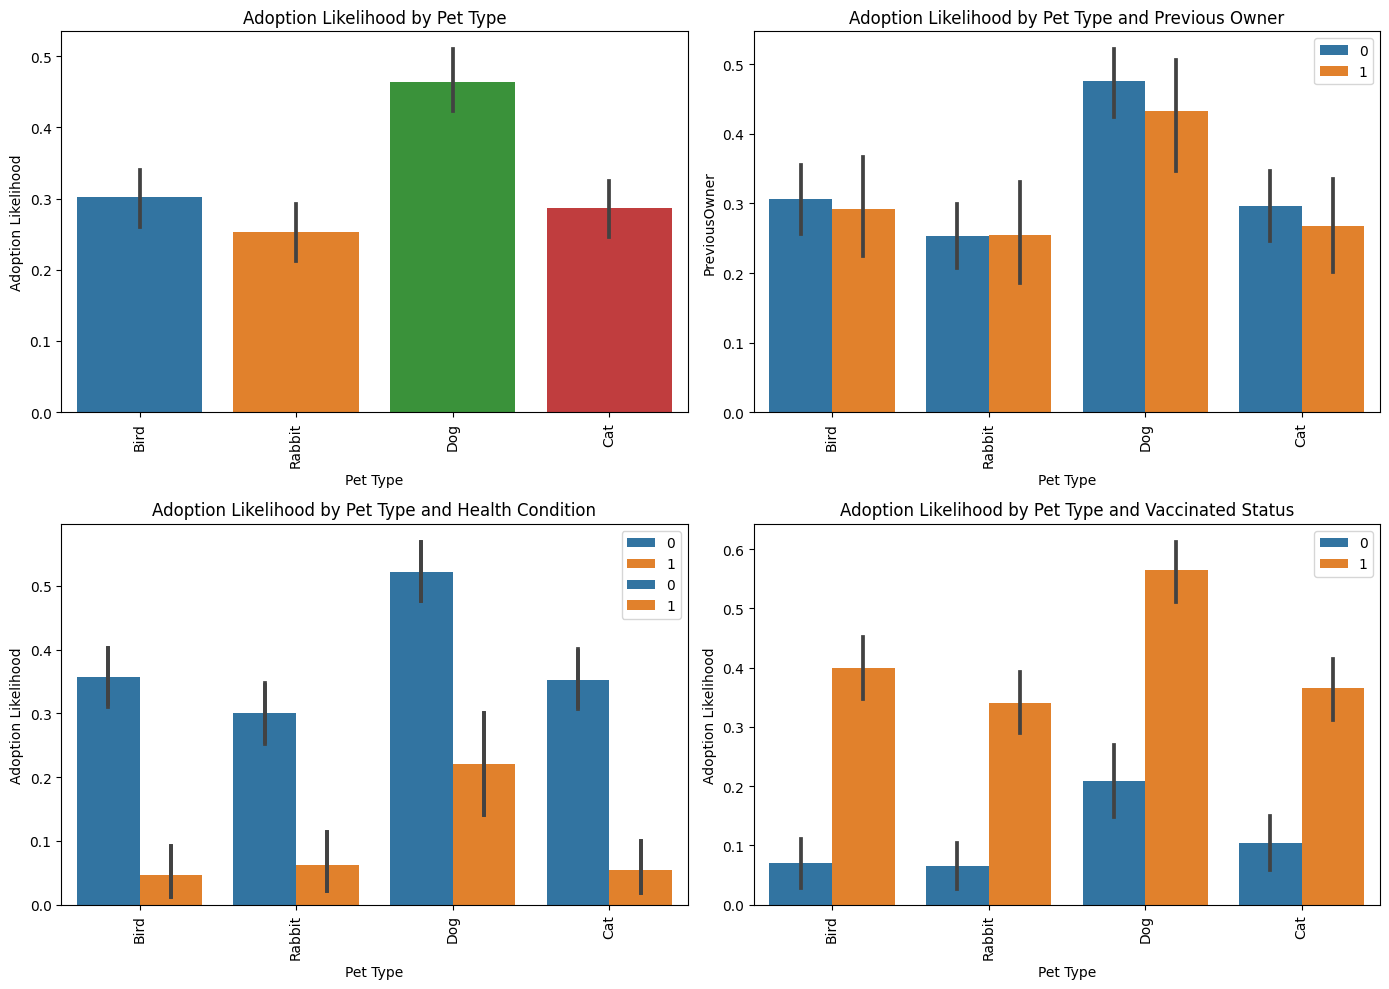

In [377]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].set_title("Adoption Likelihood by Pet Type")
sns.barplot(x="PetType", y="AdoptionLikelihood", data=df, ax=axs[0, 0])
axs[0, 0].set_xlabel("Pet Type")
axs[0, 0].set_ylabel("Adoption Likelihood")
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

axs[0, 1].set_title("Adoption Likelihood by Pet Type and Previous Owner")
sns.barplot(x="PetType", y="AdoptionLikelihood", hue="PreviousOwner", data=df, ax=axs[0, 1])
axs[0, 1].set_xlabel("Pet Type")
axs[0, 1].set_ylabel("PreviousOwner")
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
axs[0, 1].legend()

axs[1, 0].set_title("Adoption Likelihood by Pet Type and Health Condition")
sns.barplot(x="PetType", y="AdoptionLikelihood", hue="HealthCondition", data=df, ax=axs[1, 0])
axs[1, 0].set_xlabel("Pet Type")
axs[1, 0].set_ylabel("Adoption Likelihood")
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)
axs[1, 0].legend()

axs[1, 0].set_title("Adoption Likelihood by Pet Type and Health Condition")
sns.barplot(x="PetType", y="AdoptionLikelihood", hue="HealthCondition", data=df, ax=axs[1, 0])
axs[1, 0].set_xlabel("Pet Type")
axs[1, 0].set_ylabel("Adoption Likelihood")
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)
axs[1, 0].legend()

axs[1, 1].set_title("Adoption Likelihood by Pet Type and Vaccinated Status")
sns.barplot(x="PetType", y="AdoptionLikelihood", hue="Vaccinated", data=df, ax=axs[1, 1])
axs[1, 1].set_xlabel("Pet Type")
axs[1, 1].set_ylabel("Adoption Likelihood")
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].legend()

plt.tight_layout()
plt.show()

### **2. Data Preprocessing** 

##### **a. Checking missing value, Duplicate**

In [378]:
df.isnull().sum()

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

In [379]:
duplicate=df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate)}")

Number of duplicate rows: 0


#### **b. Checking each unique in columns**

In [380]:
for col in df.columns:
    print(f"unique values in '{col}' column:")
    print(df[col].unique())
    print()

unique values in 'PetID' column:
[ 500  501  502 ... 2504 2505 2506]

unique values in 'PetType' column:
['Bird' 'Rabbit' 'Dog' 'Cat']

unique values in 'Breed' column:
['Parakeet' 'Rabbit' 'Golden Retriever' 'Labrador' 'Siamese' 'Persian'
 'Poodle']

unique values in 'AgeMonths' column:
[131  73 136  97 123  70 169  13  49  60 130   5 172  27 160 149   8  50
  67  44 125  58   3  86   2 102  35  98  30 116 150  36  77  31  47  55
 106 158 121 144  12 145 140  23  92 115 104 118 108  65  84  32 161  16
  38 142 151 114  66 105  85  75 154   6 163 171 143 101  42 166  82 173
 134  80   7  14  91  20  10  25  54  33 164  95 110 141 117  79  68 128
  96  78 146  93  43 162  89 126  11 178 159  56  83 137  99 156   4 103
  40  17 124  52  63  62 155 133 138 120 167 139  26  34 112 157  21 113
 129  48  29  28 177  87  88  69 109 179 152 148 135  51  94  64 111  81
 153 122 119  15 168  59  22 174  39 175  18  46 165  19  72 132  90  24
  37  57  71 147  76 100 176  45  61 107 170  74  41 1

#### **c. Encode Categorical Variable**

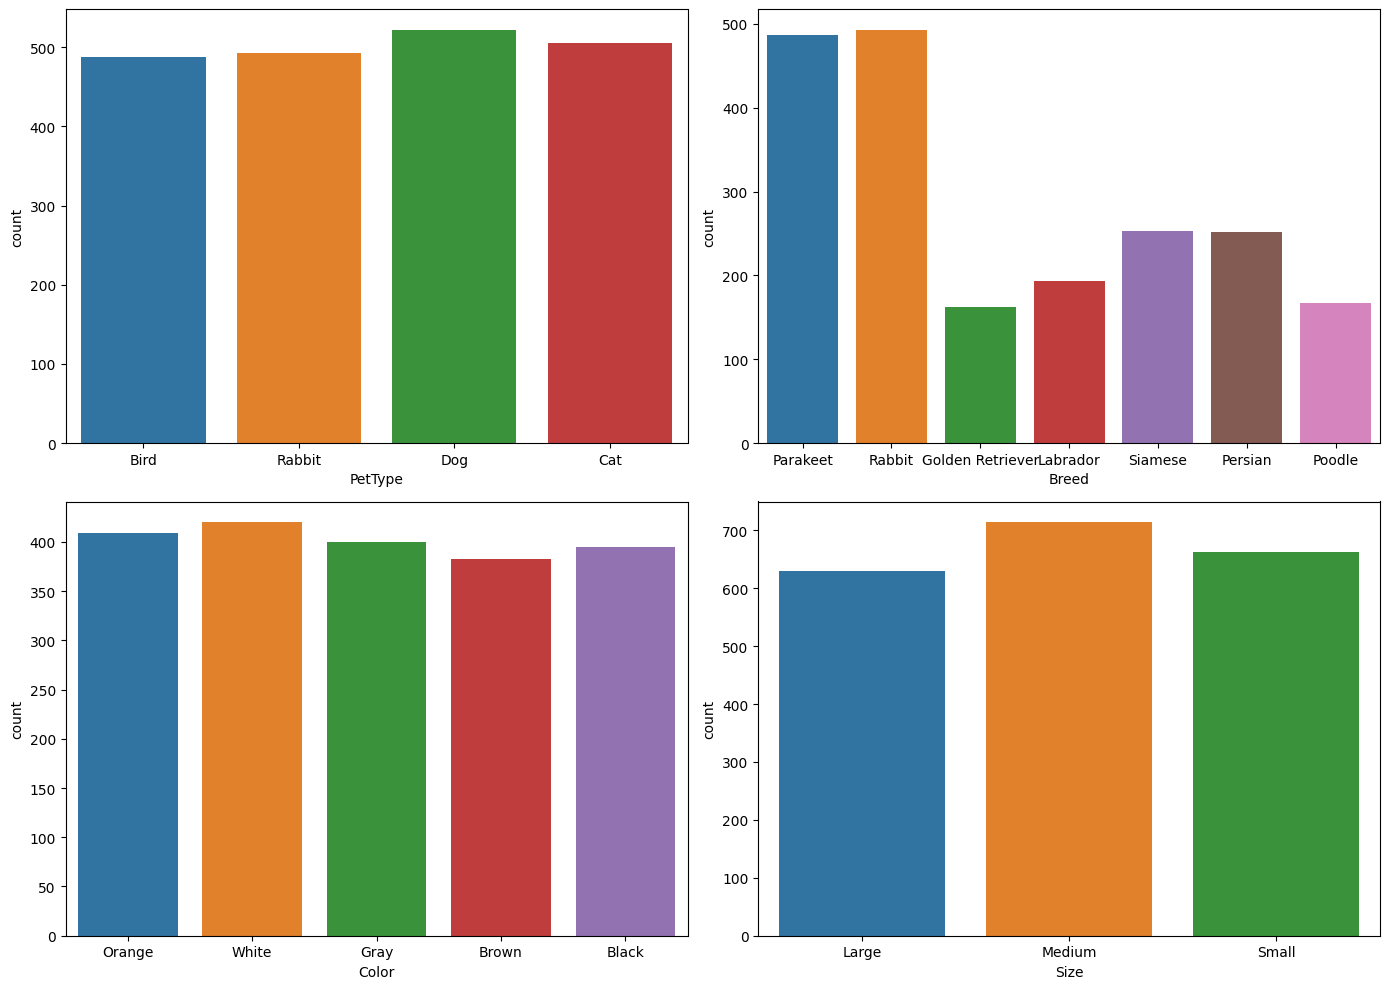

In [381]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(data=df, x='PetType', ax=axs[0, 0])
sns.countplot(data=df, x='Breed', ax=axs[0, 1])
sns.countplot(data=df, x='Color', ax=axs[1, 0])
sns.countplot(data=df, x='Size', ax=axs[1, 1])

plt.tight_layout()
plt.show()

In [382]:
label_encoder=LabelEncoder()
ohe=OneHotEncoder()

In [383]:
# Encode the PetType column, type0=Bird, type1=cat, type2=dog,type3=rabbit
df['PetType_N']= label_encoder.fit_transform(df['PetType'])
df_PetType_ohe=ohe.fit_transform(df[['PetType_N']]).toarray()
df_PetType_ohe = pd.DataFrame(df_PetType_ohe, columns=[f'PetType_{i}' for i in range(df_PetType_ohe.shape[1])])
df = pd.concat([df, df_PetType_ohe], axis=1)

In [384]:
# Encode the Breed column
#Breed0=Golden Retriever,breed1=Labrador,breed2=Parakeet,breed3=Persian,breed4=Poodle,breed5=rabbit
df['Breed_encoded'] = label_encoder.fit_transform(df['Breed'])
df_Breed_ohe = ohe.fit_transform(df[['Breed_encoded']]).toarray()
df_Breed_ohe = pd.DataFrame(df_Breed_ohe, columns=[f'Breed_{i}' for i in range(df_Breed_ohe.shape[1])])
df = pd.concat([df, df_Breed_ohe], axis=1)

In [385]:
#Encoded the color column
#,color0=Black,color1=Brown, color2=Gray, color3=Orange,color4=White
df['Color_encoded'] = label_encoder.fit_transform(df['Color'])
df_color_ohe = ohe.fit_transform(df[['Color_encoded']]).toarray()
df_color_ohe = pd.DataFrame(df_color_ohe, columns=[f'Color_{i}' for i in range(df_color_ohe.shape[1])])
df = pd.concat([df, df_color_ohe], axis=1)


In [386]:
# Encode the Size column
#S=2,M=1,L=0
df['Size_encoded'] = label_encoder.fit_transform(df['Size'])

In [387]:
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,...,Breed_4,Breed_5,Breed_6,Color_encoded,Color_0,Color_1,Color_2,Color_3,Color_4,Size_encoded
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,...,0.0,0.0,0.0,3,0.0,0.0,0.0,1.0,0.0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,...,0.0,1.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,...,0.0,0.0,0.0,3,0.0,0.0,0.0,1.0,0.0,1
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,...,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,2
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,...,0.0,1.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0


In [388]:
df = df.drop(['PetType', 'Breed', 'Color', 'Size'], axis=1)

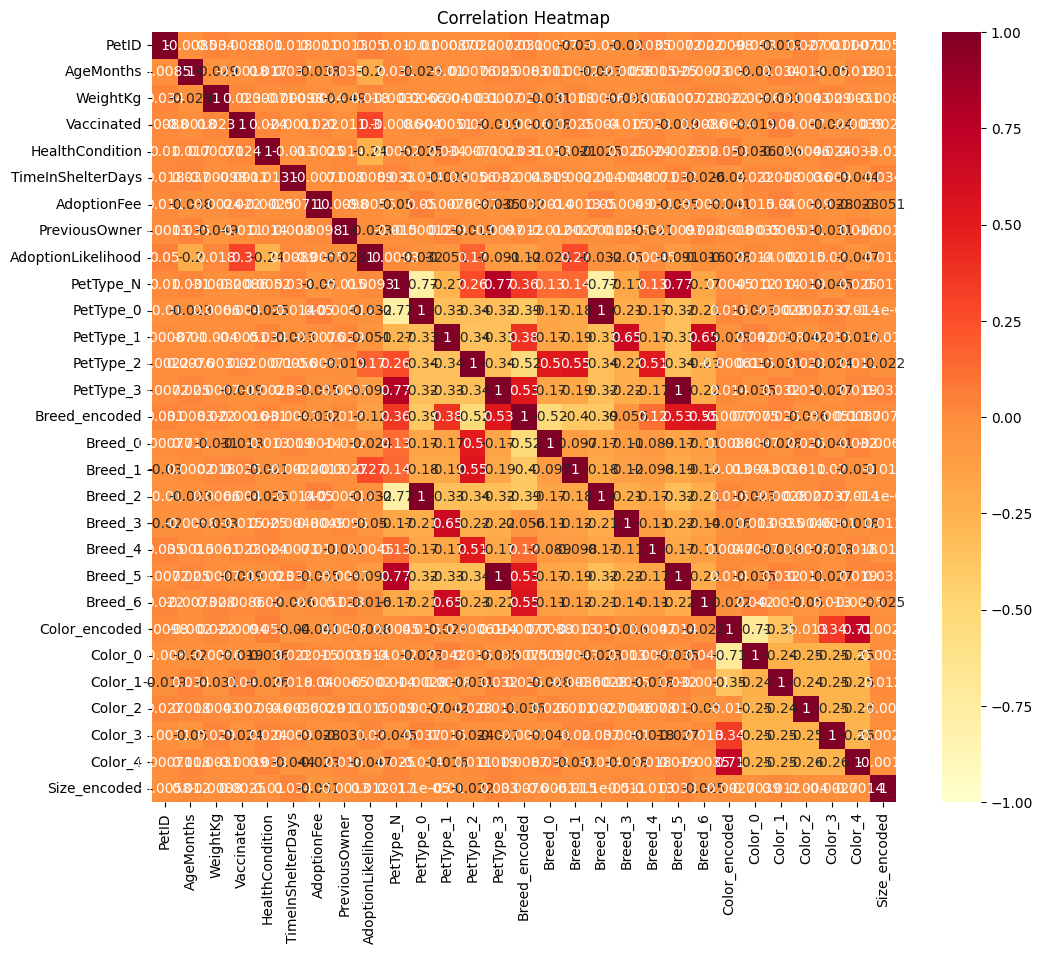

In [389]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [390]:
print("Correlation matrix:")
corr_matrix = df.corr()
print(corr_matrix)
print()

Correlation matrix:
                       PetID  AgeMonths  WeightKg  Vaccinated  \
PetID               1.000000  -0.008464  0.034315    0.008808   
AgeMonths          -0.008464   1.000000 -0.029189   -0.001801   
WeightKg            0.034315  -0.029189  1.000000    0.022526   
Vaccinated          0.008808  -0.001801  0.022526    1.000000   
HealthCondition     0.010486   0.017200  0.000708    0.024079   
TimeInShelterDays   0.017683   0.036837 -0.000980   -0.001123   
AdoptionFee         0.010557  -0.038129 -0.002367    0.021662   
PreviousOwner       0.001339   0.034943 -0.049155   -0.011460   
AdoptionLikelihood  0.049582  -0.202209  0.017601    0.301311   
PetType_N           0.010458   0.031115 -0.003249   -0.008617   
PetType_0          -0.010356  -0.022609  0.006589    0.004038   
PetType_1           0.000870  -0.010046 -0.004036   -0.005087   
PetType_2           0.002235   0.007605 -0.003129    0.019981   
PetType_3           0.007158   0.024892  0.000696   -0.019256   
Breed

In [391]:
X = df.drop('AdoptionLikelihood', axis=1)
y = df['AdoptionLikelihood']

**Loigstic Regression model**

In [392]:
lr_model = LogisticRegression(max_iter=1000)
rfe = RFE(lr_model,n_features_to_select=10) 
rfe = rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Selected features: Index(['Vaccinated', 'HealthCondition', 'PetType_2', 'Breed_0', 'Breed_1',
       'Breed_3', 'Breed_4', 'Breed_5', 'Color_1', 'Color_4'],
      dtype='object')


**SVM**

In [393]:
n_features_to_select = 10 
svm_model = SVC(kernel="linear", max_iter=1000)
rfe_svm = RFE(svm_model, n_features_to_select=n_features_to_select)
rfe_svm.fit(X, y)
selected_features_svm = X.columns[rfe_svm.support_]
print("Selected features by SVM:", selected_features_svm)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packa

Selected features by SVM: Index(['Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'PreviousOwner',
       'PetType_0', 'PetType_3', 'Breed_0', 'Breed_1', 'Breed_5', 'Color_4'],
      dtype='object')


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


**Decision Tree**

In [394]:
tree_model = DecisionTreeClassifier()
rfe_tree = RFE(tree_model, n_features_to_select=n_features_to_select)
rfe_tree.fit(X, y)
selected_features_tree = X.columns[rfe_tree.support_]
print("Selected features by Decision Tree:", selected_features_tree)

Selected features by Decision Tree: Index(['PetID', 'AgeMonths', 'WeightKg', 'Vaccinated', 'HealthCondition',
       'TimeInShelterDays', 'AdoptionFee', 'PetType_1', 'Breed_1',
       'Size_encoded'],
      dtype='object')


#### **d. Normalize or Feature Scalling**

In [395]:
df.head()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,PetType_N,...,Breed_4,Breed_5,Breed_6,Color_encoded,Color_0,Color_1,Color_2,Color_3,Color_4,Size_encoded
0,500,131,5.039768,1,0,27,140,0,0,0,...,0.0,0.0,0.0,3,0.0,0.0,0.0,1.0,0.0,0
1,501,73,16.086727,0,0,8,235,0,0,3,...,0.0,1.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0
2,502,136,2.076286,0,0,85,385,0,0,2,...,0.0,0.0,0.0,3,0.0,0.0,0.0,1.0,0.0,1
3,503,97,3.339423,0,0,61,217,1,0,0,...,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,2
4,504,123,20.498100,0,0,28,14,1,0,3,...,0.0,1.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0


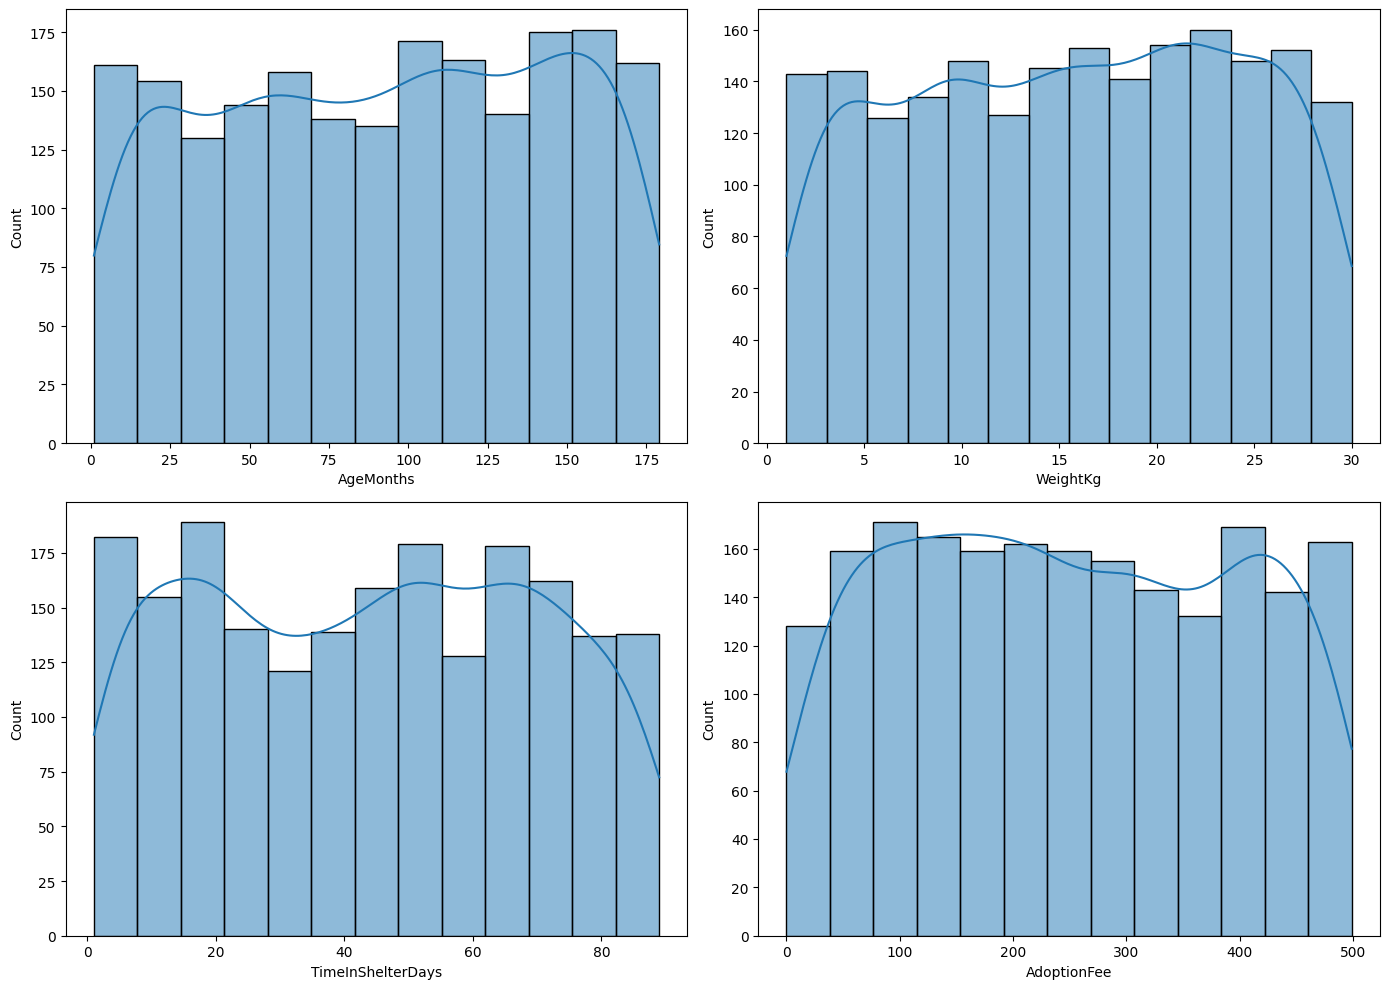

In [396]:
# Plot distribution of numerical variables
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data=df, x='AgeMonths', kde=True, ax=axs[0, 0])
sns.histplot(data=df, x='WeightKg', kde=True, ax=axs[0, 1])
sns.histplot(data=df, x='TimeInShelterDays', kde=True, ax=axs[1, 0])
sns.histplot(data=df, x='AdoptionFee', kde=True, ax=axs[1, 1])

plt.tight_layout()
plt.show()


In [397]:
numeric_features = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [398]:
df.head()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,PetType_N,...,Breed_4,Breed_5,Breed_6,Color_encoded,Color_0,Color_1,Color_2,Color_3,Color_4,Size_encoded
0,500,0.742691,-1.281098,1,0,-0.659602,-0.764025,0,0,0,...,0.0,0.0,0.0,3,0.0,0.0,0.0,1.0,0.0,0
1,501,-0.369797,0.045756,0,0,-1.397929,-0.098998,0,0,3,...,0.0,1.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0
2,502,0.838595,-1.637043,0,0,1.594240,0.951044,0,0,2,...,0.0,0.0,0.0,3,0.0,0.0,0.0,1.0,0.0,1
3,503,0.090543,-1.485328,0,0,0.661616,-0.225003,1,0,0,...,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,2
4,504,0.589244,0.575608,0,0,-0.620743,-1.646060,1,0,3,...,0.0,1.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0


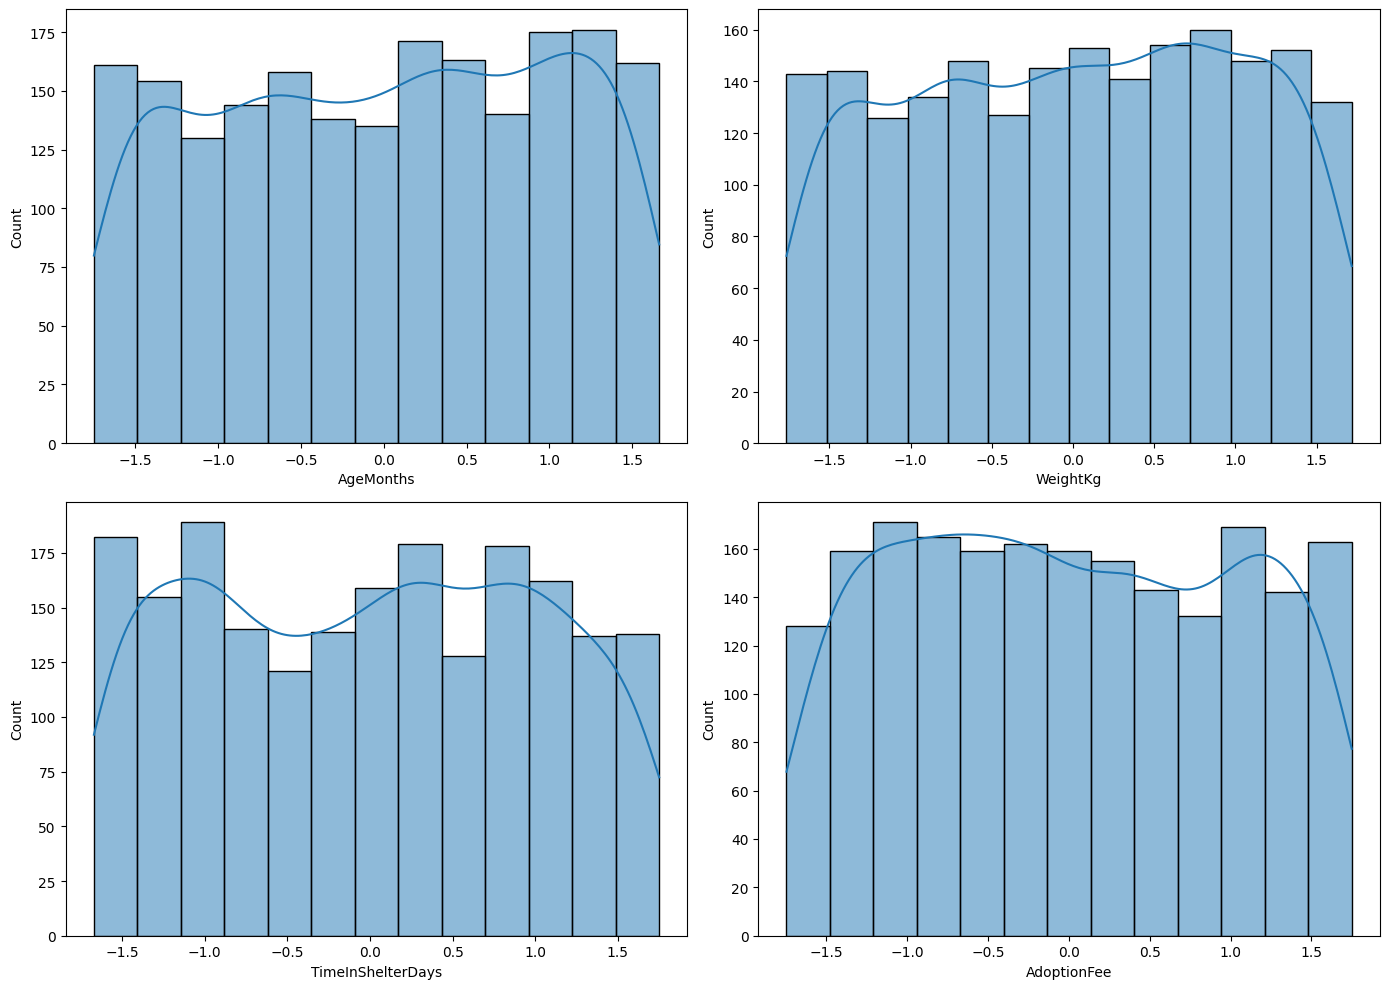

In [399]:
# Plot distribution of scaled numerical variables
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data=df, x='AgeMonths', kde=True, ax=axs[0, 0])
sns.histplot(data=df, x='WeightKg', kde=True, ax=axs[0, 1])
sns.histplot(data=df, x='TimeInShelterDays', kde=True, ax=axs[1, 0])
sns.histplot(data=df, x='AdoptionFee', kde=True, ax=axs[1, 1])

plt.tight_layout()
plt.show()


### **3. Model Selection**

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Transform Both Training and Testing Data**

In [401]:
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "features": selected_features
    },
    "SVM": {
        "model": SVC(kernel="linear", max_iter=1000, probability=True),
        "features": selected_features_svm
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "features": selected_features_tree
    }
}

In [402]:
best_model_name = None
best_accuracy = -1
best_model = None

In [403]:
for model_name, model_info in models.items():
    model = model_info["model"]
    features = model_info["features"]
    X_train_selected = X_train[features]
    X_test_selected = X_test[features]
    model.fit(X_train_selected, y_train)
    y_train_pred = model.predict(X_train_selected)
   
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    # Predict on the test set
    y_test_pred = model.predict(X_test_selected)
    
    # Calculate test evaluation metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
 
    print(f"{model_name} Evaluation:")
    print(f"  Training Accuracy: {train_accuracy:.4f}")
    print(f"  Training Precision: {train_precision:.4f}")
    print(f"  Training Recall: {train_recall:.4f}")
    print(f"  Training F1 Score: {train_f1:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Test Precision: {test_precision:.4f}")
    print(f"  Test Recall: {test_recall:.4f}")
    print(f"  Test F1 Score: {test_f1:.4f}")
    print("="*40)
    
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model_name = model_name
        best_model = model

print(f"Best model based on test accuracy: {best_model_name} with accuracy {best_accuracy:.4f}")


Logistic Regression Evaluation:
  Training Accuracy: 0.7283
  Training Precision: 0.7213
  Training Recall: 0.7283
  Training F1 Score: 0.6921
  Test Accuracy: 0.6791
  Test Precision: 0.6469
  Test Recall: 0.6791
  Test F1 Score: 0.6387
SVM Evaluation:
  Training Accuracy: 0.5140
  Training Precision: 0.5867
  Training Recall: 0.5140
  Training F1 Score: 0.5279
  Test Accuracy: 0.5149
  Test Precision: 0.5943
  Test Recall: 0.5149
  Test F1 Score: 0.5279
Decision Tree Evaluation:
  Training Accuracy: 1.0000
  Training Precision: 1.0000
  Training Recall: 1.0000
  Training F1 Score: 1.0000
  Test Accuracy: 0.9428
  Test Precision: 0.9432
  Test Recall: 0.9428
  Test F1 Score: 0.9429
Best model based on test accuracy: Decision Tree with accuracy 0.9428


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [404]:
y_test_pred = best_model.predict(X_test_selected)

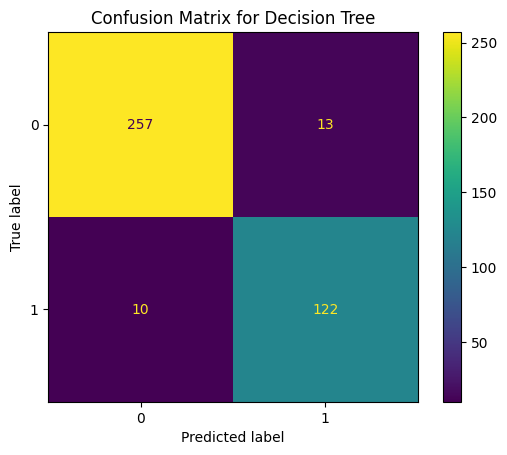

In [405]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

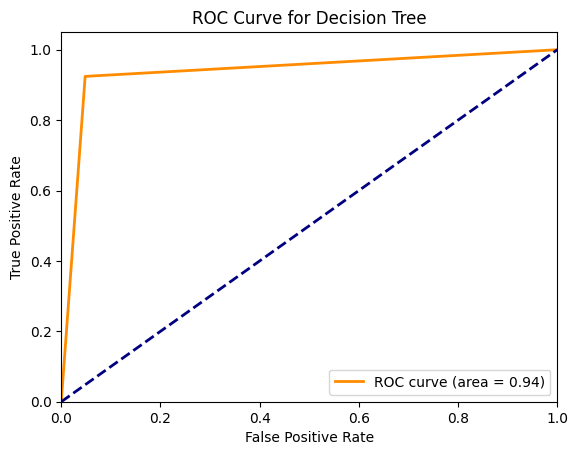

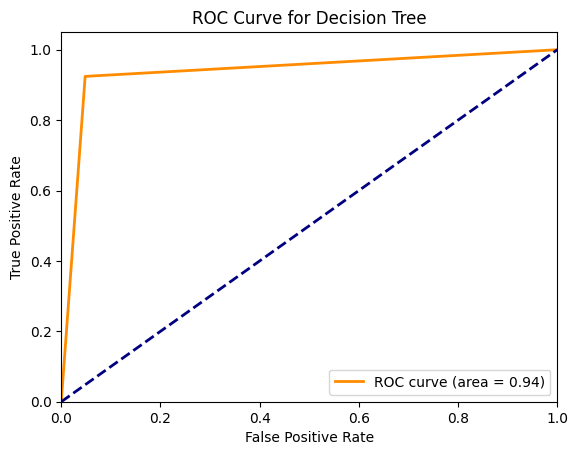

In [406]:
if hasattr(best_model, "predict_proba"):
    y_test_prob = best_model.predict_proba(X_test_selected)[:, 1]
elif hasattr(best_model, "decision_function"):
    y_test_prob = best_model.decision_function(X_test_selected)
else:
    y_test_prob = y_test_pred  # In case predict_proba and decision_function are not available

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_model_name}')
plt.legend(loc="lower right")
plt.show()
if hasattr(best_model, "predict_proba"):
    y_test_prob = best_model.predict_proba(X_test_selected)[:, 1]
elif hasattr(best_model, "decision_function"):
    y_test_prob = best_model.decision_function(X_test_selected)
else:
    y_test_prob = y_test_pred  # In case predict_proba and decision_function are not available

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_model_name}')
plt.legend(loc="lower right")
plt.show()


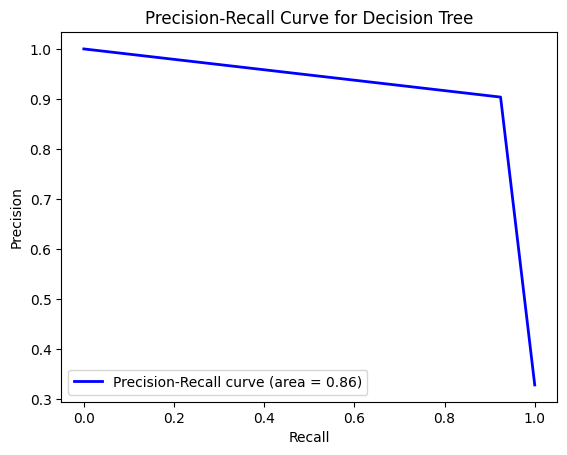

In [407]:
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
average_precision = average_precision_score(y_test, y_test_prob)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for {best_model_name}')
plt.legend(loc="lower left")
plt.show()

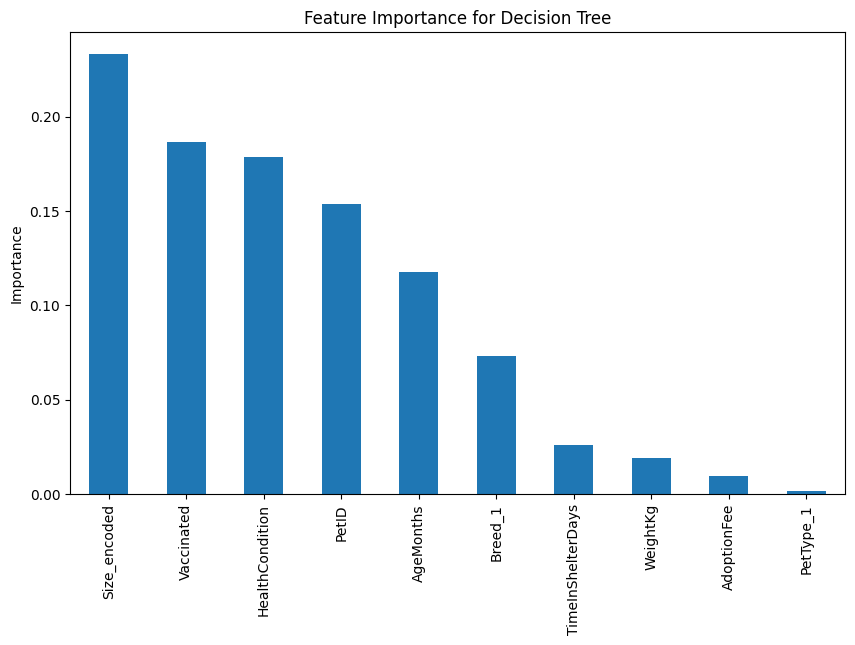

In [408]:
if best_model_name == "Logistic Regression":
    coefficients = best_model.coef_[0]
    feature_importance = pd.Series(coefficients, index=selected_features)
    feature_importance.sort_values(ascending=False, inplace=True)

    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar')
    plt.title(f'Feature Importance for {best_model_name}')
    plt.ylabel('Coefficient Value')
    plt.show()

elif best_model_name == "Decision Tree":
    feature_importance = best_model.feature_importances_
    feature_importance_series = pd.Series(feature_importance, index=selected_features_tree)
    feature_importance_series.sort_values(ascending=False, inplace=True)

    plt.figure(figsize=(10, 6))
    feature_importance_series.plot(kind='bar')
    plt.title(f'Feature Importance for {best_model_name}')
    plt.ylabel('Importance')
    plt.show()